# 0. Load Dependencies

In [1]:
### Import the vulnerability toolkit library
import sys
repoDir = 'C:/Users/Moayad/Documents/GitHub/stickModel'
sys.path.insert(1, f'{repoDir}')
from stickModel import stickModel
from im_calculator import *
from utils import *
from units import *
from postprocessors import *
from plotters import * 

### Import other libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. User Input

In [2]:
### Define Capacity Curves Directory
capCurvesDir= f'{repoDir}/raw/ip-capacities'

### Define Building Class
currentBuildingClass='CR_LFINF+CDM+DUM_H4'

### Define Ground-Motion Records Directory
gmrsDir = f'{repoDir}/examples/records'

### Define Output Directory
outDir = f'{repoDir}/examples/'

### Define Transformation Factor
gamma=1.33

### Define Storey Height
storeyHeight=2.8

### Define Number of Stories (for single-degree-of-freedom systems, set nst = 1)
nst = 1     # single-degree-of-freedom system

### Define Mass (for single-degree-of-freedom systems in GEM database, set mass = 1.0 tonne)
mass = 1.0  # single-degree-of-freedom system

### Define Damage Thresholds for Post-Processing
damageThresholds = [0.0030, 0.0080, 0.0250, 0.0600]  # Maximum interstorey drift values (ratio, not in %)

### Define the Building-to-Building Variability or Modelling Uncertainty
beta_build2build = 0.3                               # Building-to-building variability or modelling uncertainty


# 2. Prepare the Model

In [3]:
### Import the equivalent SDOF capacity array 
# This is an array that contains the deformation (1st column) and the strength (2nd column) points. The toolkit requires non-zero
# first entries, therefore if applicable, remove the initial zero rows. Else, the nonlinear material will be ill conditioned and 
# the kernel would exit when running OpenSees
sdofCapArray = np.array(pd.read_csv(f'{capCurvesDir}/{currentBuildingClass}.csv', header = None))[1:,:]

### Construct the height list (for single-degrees-of-freedom, the size of the list is 1x1)
flh = [storeyHeight]*nst

### Construct the mass list (for single-degrees-of-freedom, the size of the list is 1x1)
flm = [mass]*nst

### Extract the storey-strength deformation relationship
rows, columns = np.shape(sdofCapArray)
stD = np.zeros([nst,rows])
stF = np.zeros([nst,rows])
for i in range(nst):
    # get the displacement or spectral displacement arrays at each storey (for sdof, only 1 row)
    stF[i,:] = sdofCapArray[:,1].transpose()
    # get the force or spectral acceleration arrays at each storey (for sdof, only 1 row)
    stD[i,:] = sdofCapArray[:,0].transpose()

# 3. Define Analysis Objects

In [4]:
### Fetch ground motion records
gmrs = sorted_alphanumeric(os.listdir(f'{gmrsDir}/gmrs'))   # Sort the ground-motion records alphanumerically

### Initialise storage lists
coll_index_list = []               # List for collapse index
peak_disp_list  = []               # List for peak floor displacement (returns all peak values along the building height)
peak_drift_list = []               # List for peak storey drift (returns all peak values along the building height)
peak_accel_list = []               # List for peak floor acceleration (returns all peak values along the building height)
max_peak_drift_list = []           # List for maximum peak storey drift (returns the maximum value) 
max_peak_drift_dir_list = []       # List for maximum peak storey drift directions
max_peak_drift_loc_list = []       # List for maximum peak storey drift locations
max_peak_accel_list = []           # List for maximum peak floor acceleration (returns the maximum value)
max_peak_accel_dir_list = []       # List for maximum peak floor acceleration directions 
max_peak_accel_loc_list = []       # List for maximum peak floor acceleration locations 
pga = []; sa = []                  # List for intensity measures


# 4. Compile the Model and Run Nonlinear Time-History Analysis

HystereticSM: multi-point envelope + DCR recorders  - Code by Silvia Mazzoni, 2023 (silviamazzoni@yahoo.com) 

WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


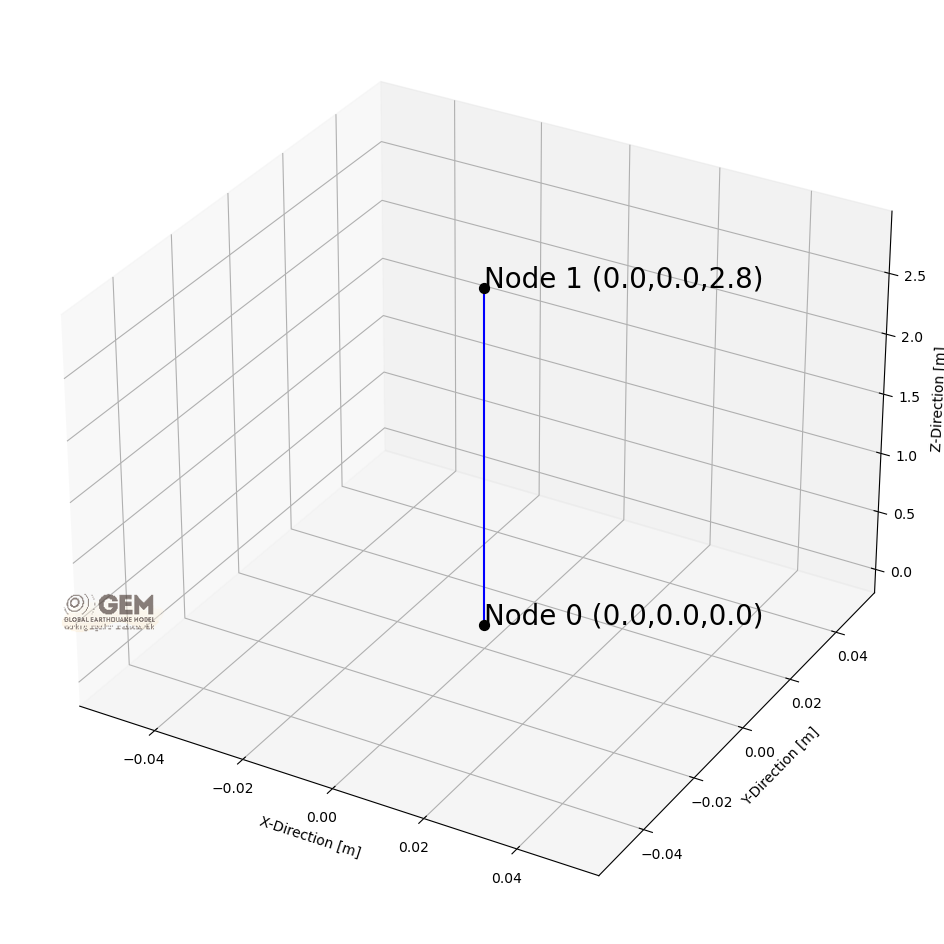

Fundamental Period:  T = 0.851 s
~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 1 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 2 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 3 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 4 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 5 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 6 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 7 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 8 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 9 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 10 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 11 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 12 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 13 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 14 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 15 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 16 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 17 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 18 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 19 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 20 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 21 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 22 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 23 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 24 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 25 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 26 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 27 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 28 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 29 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 30 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 31 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 32 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 33 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 34 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 35 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 36 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 37 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 38 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 39 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 40 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 41 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 42 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 43 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 44 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 45 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 46 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 47 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 48 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 49 out 50 ==================
Fundamental Period:  T = 0.851 s


WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance


~~~~~~~ ANALYSIS SUCCESSFUL ~~~~~~~~~
============== ANALYSIS COMPLETED: 50 out 50 ==================


In [5]:
### Initialise the stickModel instance using the parameters defined in previous sections for every ground-motion record
for i in range(len(gmrs)):
    model = stickModel(nst,flh,flm,stD,stF,currentBuildingClass) # Build the model
    model.mdof_initialise()                                      # Initialise the domain
    model.mdof_nodes()                                           # Construct the nodes
    model.mdof_fixity()                                          # Set the boundary conditions 
    model.mdof_loads()                                           # Assign the loads
    model.mdof_material()                                        # Assign the nonlinear storey material
    model.do_gravity_analysis()                                  # Do gravity analysis
    # To visualise the model only for the first run
    if i==0:
        model.plot_model()                                       # Visualise the model
    else: 
        pass
    T = model.do_modal_analysis(num_modes = 1)                   # Do modal analysis and get period of vibration

    ### Define ground motion objects
    fnames = [f'{gmrsDir}/gmrs/{gmrs[i]}',f'{gmrsDir}/gmrs/{gmrs[i]}']      # Ground-motion record names (if running only one direction, then fnames is a list that contains only one gmrs)
    fdts = f'{gmrsDir}/dts/dts_{i}.csv'                                   # Ground-motion time-step names 
    dt_gm = pd.read_csv(fdts)[pd.read_csv(fdts).columns[0]].loc[0]      # Ground-motion time-step
    t_max = pd.read_csv(fdts)[pd.read_csv(fdts).columns[0]].iloc[-1]    # Ground-motion duration

    ### Get intensity measures
    im = intensityMeasure(pd.read_csv(fnames[0]).to_numpy().flatten(),dt_gm) # Initialise the intensityMeasure object
    pga.append(im.get_sa(0.0))                                               # Append PGA values 
    sa.append(im.get_sa(T[0]))                                               # Append Sa(T1) values

    ### Define analysis params and do NLTHA
    dt_ansys = dt_gm                                                         # Set the analysis time-step
    sf = units.g                                                             # Set the scaling factor (if records are in g, a scaling factor of 9.81 m/s2 must be used to be consistent with opensees) 
    collLimit = 10.00                                                        # Set a large number for numerical collapse
    
    ### Run the NLTHA
    control_nodes, coll_index, peak_drift, peak_accel, max_peak_drift, max_peak_drift_dir, max_peak_drift_loc, max_peak_accel, max_peak_accel_dir, max_peak_accel_loc, peak_disp = model.do_nrha_analysis(fnames, dt_gm, sf, t_max, dt_ansys, collLimit, outDir)

    print('================================================================')
    print('============== ANALYSIS COMPLETED: {:d} out {:d} =================='.format(i+1, len(gmrs)))
    print('================================================================')
    
    ### Store the analysis
    coll_index_list.append(coll_index)
    peak_drift_list.append(peak_drift)
    peak_accel_list.append(peak_accel)
    peak_disp_list.append(peak_disp)
    max_peak_drift_list.append(max_peak_drift)
    max_peak_drift_dir_list.append(max_peak_drift_dir)
    max_peak_drift_loc_list.append(max_peak_drift_loc)
    max_peak_accel_list.append(max_peak_accel)
    max_peak_accel_dir_list.append(max_peak_accel_dir)
    max_peak_accel_loc_list.append(max_peak_accel_loc)

# Ignore the warning: "WARNING ZeroLength::setDomain(): Element 2000 has L= 2.8, which is greater than the tolerance".
# In fact, ZeroLength elements do function for non-zero lengths yet the warning is issued due to this non-conventional use.

# 5. Post-Process the Cloud Analysis


                    Breakpoint Regression Results                     
No. Observations                       50
No. Model Parameters                    4
Degrees of Freedom                     46
Res. Sum of Squares               21.7274
Total Sum of Squares              30.7106
R Squared                        0.292510
Adjusted R Squared               0.229622
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               -1.12425        0.253      -4.4447      5.51e-05      -1.6334      -0.6151
alpha1              0.222176       0.0535        4.152      0.000141      0.11447      0.32989
beta1               -2.09447         2.11     -0.99375             -      -6.3369        2.148
breakpoint1        -0.907525         0.29            -             -      -1.4912     -0.32384
-----------------

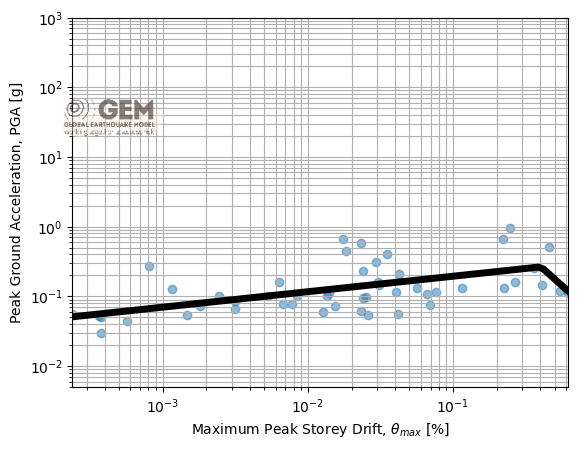

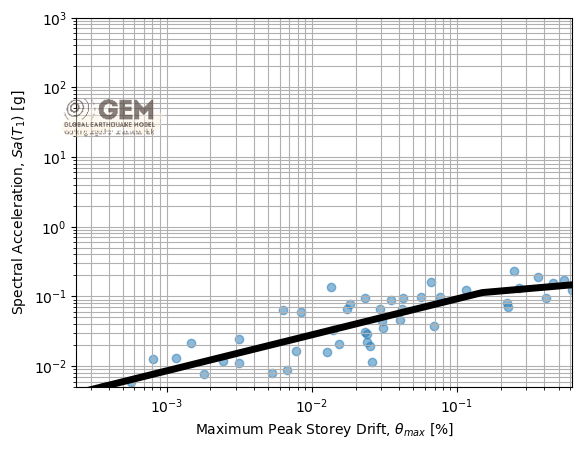

In [6]:
### Process the cloud analysis results for PGA and SA(T1)
imvector1, edpvector1 = cloudAnalysis(pga, max_peak_drift_list)
imvector2, edpvector2 = cloudAnalysis(sa,  max_peak_drift_list)

### Plot cloud analysis results
plotCloudAnalysis(pga, max_peak_drift_list, imvector1, edpvector1, 'Peak Ground Acceleration, PGA [g]', [False])
plotCloudAnalysis(sa,  max_peak_drift_list, imvector2, edpvector2, 'Spectral Acceleration, $Sa(T_{1})$ [g]', [False])

# 6. Post-Process the Fragilities

Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Breakpoint values outside range 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Algorithm stopped as max iterations reached 
Run 5: Breakpoint values outside range 
Run 6: Breakpoint values outside range 
Run 7: Breakpoint values outside range 
Run 8: Algorithm stopped as max iterations reached 
Run 9: Breakpoint values outside range 
Run 10: Algorithm stopped as max iterations reached 
Run 11: Algorithm stopped as max iterations reached 
Run 12: Breakpoint values outside range 
Run 13: Algorithm stopped as max iterations reached 
Run 14: Algorithm stopped as max iterations reached 
Run 15: Algorithm stopped as max iterations reached 
Run 16: Breakpoint values outside range 
Run 17: Algorithm stopped as max iterations reached 
Run 18: Algorithm stopped as max iterations reached 
Ru

C:\Users/Moayad/Documents/GitHub/stickModel\postprocessors.py:108: RuntimeWarning: invalid value encountered in log
  yy = b*np.log(xx)+a
C:\Users/Moayad/Documents/GitHub/stickModel\postprocessors.py:140: RuntimeWarning: divide by zero encountered in log
  p = stats.norm.cdf(np.log((np.linspace(0.0, 5.0, 1000))/ theta) / beta_total, loc=0, scale=1)



                    Breakpoint Regression Results                     
No. Observations                       50
No. Model Parameters                    4
Degrees of Freedom                     46
Res. Sum of Squares               51.4443
Total Sum of Squares              213.811
R Squared                        0.759394
Adjusted R Squared               0.738007
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                8.57064         7.14       1.2009         0.236      -5.7955       22.937
alpha1                 3.028         1.36        2.226         0.031      0.28984       5.7662
beta1               -1.61869         1.37        -1.18             -        -4.38       1.1426
breakpoint1         -4.83531        0.475            -             -      -5.7905      -3.8802
-----------------

C:\Users/Moayad/Documents/GitHub/stickModel\postprocessors.py:140: RuntimeWarning: divide by zero encountered in log
  p = stats.norm.cdf(np.log((np.linspace(0.0, 5.0, 1000))/ theta) / beta_total, loc=0, scale=1)


Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Algorithm stopped as max iterations reached 
Run 5: Algorithm stopped as max iterations reached 
Run 6: Algorithm stopped as max iterations reached 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Algorithm stopped as max iterations reached 
Run 9: Breakpoint values outside range 
Run 10: Breakpoint values outside range 
Run 11: Algorithm stopped as max iterations reached 
Run 12: Breakpoint values outside range 
Run 13: Breakpoint values outside range 
Run 14: Breakpoint values outside range 
Run 15: Algorithm stopped as max iterations reached 
Run 16: Algorithm stopped as max iterations reached 
Run 17: Algorithm stopped as max iterations reached 
Run 18: Breakpoint values outsi

C:\Users/Moayad/Documents/GitHub/stickModel\postprocessors.py:108: RuntimeWarning: invalid value encountered in log
  yy = b*np.log(xx)+a
C:\Users/Moayad/Documents/GitHub/stickModel\postprocessors.py:140: RuntimeWarning: divide by zero encountered in log
  p = stats.norm.cdf(np.log((np.linspace(0.0, 5.0, 1000))/ theta) / beta_total, loc=0, scale=1)



                    Breakpoint Regression Results                     
No. Observations                       50
No. Model Parameters                    4
Degrees of Freedom                     46
Res. Sum of Squares               51.4443
Total Sum of Squares              213.811
R Squared                        0.759394
Adjusted R Squared               0.738007
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                8.57064         7.14       1.2009         0.236      -5.7955       22.937
alpha1                 3.028         1.36        2.226         0.031      0.28984       5.7662
beta1               -1.61869         1.37        -1.18             -        -4.38       1.1426
breakpoint1         -4.83531        0.475            -             -      -5.7905      -3.8802
-----------------

C:\Users/Moayad/Documents/GitHub/stickModel\postprocessors.py:140: RuntimeWarning: divide by zero encountered in log
  p = stats.norm.cdf(np.log((np.linspace(0.0, 5.0, 1000))/ theta) / beta_total, loc=0, scale=1)


Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Algorithm stopped as max iterations reached 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Breakpoint values outside range 
Run 5: Algorithm stopped as max iterations reached 
Run 6: Algorithm stopped as max iterations reached 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Algorithm stopped as max iterations reached 
Run 9: Algorithm stopped as max iterations reached 
Run 10: Algorithm stopped as max iterations reached 
Run 11: Algorithm stopped as max iterations reached 
Run 12: Algorithm stopped as max iterations reached 
Run 13: Algorithm stopped as max iterations reached 
Run 14: Algorithm stopped as max iterations reached 
Run 15: Algorithm stopped as max iterations reached 
Run 16: Algorithm stopped as max iterations reached 
Run 17: Algorithm stoppe

C:\Users/Moayad/Documents/GitHub/stickModel\postprocessors.py:108: RuntimeWarning: invalid value encountered in log
  yy = b*np.log(xx)+a
C:\Users/Moayad/Documents/GitHub/stickModel\postprocessors.py:140: RuntimeWarning: divide by zero encountered in log
  p = stats.norm.cdf(np.log((np.linspace(0.0, 5.0, 1000))/ theta) / beta_total, loc=0, scale=1)



                    Breakpoint Regression Results                     
No. Observations                       50
No. Model Parameters                    4
Degrees of Freedom                     46
Res. Sum of Squares               51.4443
Total Sum of Squares              213.811
R Squared                        0.759394
Adjusted R Squared               0.738007
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                8.57064         7.14       1.2009         0.236      -5.7955       22.937
alpha1                 3.028         1.36        2.226         0.031      0.28984       5.7662
beta1               -1.61869         1.37        -1.18             -        -4.38       1.1426
breakpoint1         -4.83531        0.475            -             -      -5.7905      -3.8802
-----------------

C:\Users/Moayad/Documents/GitHub/stickModel\postprocessors.py:140: RuntimeWarning: divide by zero encountered in log
  p = stats.norm.cdf(np.log((np.linspace(0.0, 5.0, 1000))/ theta) / beta_total, loc=0, scale=1)


Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Algorithm stopped as max iterations reached 
Run 5: Breakpoint values outside range 
Run 6: Algorithm stopped as max iterations reached 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Breakpoint values outside range 
Run 9: Algorithm stopped as max iterations reached 
Run 10: Algorithm stopped as max iterations reached 
Run 11: Breakpoint values outside range 
Run 12: Algorithm stopped as max iterations reached 
Run 13: Algorithm stopped as max iterations reached 
Run 14: Algorithm stopped as max iterations reached 
Run 15: Algorithm stopped as max iterations reached 
Run 16: Algorithm stopped as max iterations reached 
Run 17: Breakpoint values outside range 
Run 18: Algorithm s

C:\Users/Moayad/Documents/GitHub/stickModel\postprocessors.py:108: RuntimeWarning: invalid value encountered in log
  yy = b*np.log(xx)+a
C:\Users/Moayad/Documents/GitHub/stickModel\postprocessors.py:140: RuntimeWarning: divide by zero encountered in log
  p = stats.norm.cdf(np.log((np.linspace(0.0, 5.0, 1000))/ theta) / beta_total, loc=0, scale=1)



                    Breakpoint Regression Results                     
No. Observations                       50
No. Model Parameters                    4
Degrees of Freedom                     46
Res. Sum of Squares               51.4443
Total Sum of Squares              213.811
R Squared                        0.759394
Adjusted R Squared               0.738007
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                8.57064         7.14       1.2009         0.236      -5.7955       22.937
alpha1                 3.028         1.36        2.226         0.031      0.28984       5.7662
beta1               -1.61869         1.37        -1.18             -        -4.38       1.1426
breakpoint1         -4.83531        0.475            -             -      -5.7905      -3.8802
-----------------

C:\Users/Moayad/Documents/GitHub/stickModel\postprocessors.py:140: RuntimeWarning: divide by zero encountered in log
  p = stats.norm.cdf(np.log((np.linspace(0.0, 5.0, 1000))/ theta) / beta_total, loc=0, scale=1)


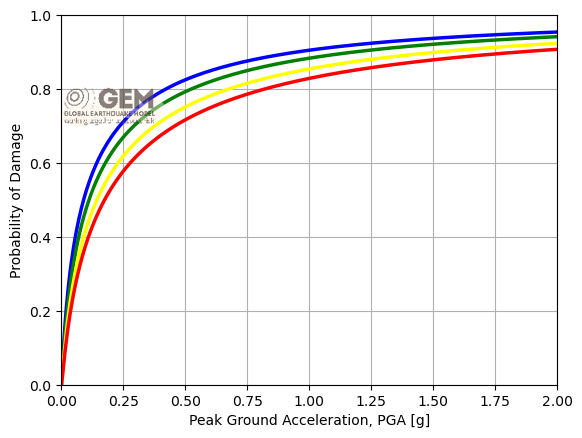

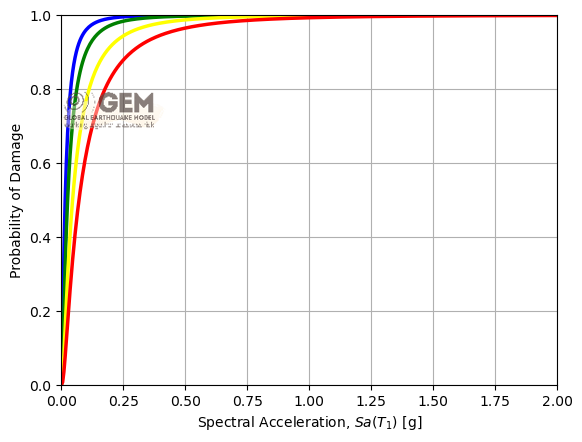

In [7]:
### Initialise storage lists
thetaList1 = []; thetaList2 = []
betaList1  = []; betaList2  = []
poeList1   = []; poeList2   = []

### Calculate the median intensities and the probabilities of exceeding each damage state for a range of intensity measure values
for i in range(len(damageThresholds)):

    ### Peak ground acceleration
    theta, beta = calculateFragParams(pga, max_peak_drift_list, edpvector1, imvector1, damageThresholds[i]) # Calculate the fragility function parameters
    thetaList1.append(theta)                                                                                # Store the median seismic intensity
    betaList1.append(beta)                                                                                  # Store the total variability
    imls, poe = getDamageProbability(thetaList1[i], betaList1[i])                                           # Extract the range of intensity measure levels and the probabilities of damage
    poeList1.append(poe)                                                                                    # Store the probabilities of damage

    ### Spectral acceleration
    theta, beta = calculateFragParams(sa, max_peak_drift_list, edpvector2, imvector2, damageThresholds[i])  # Calculate the fragility function parameters
    thetaList2.append(theta)                                                                                # Store the median seismic intensity
    betaList2.append(beta)                                                                                  # Store the total variability
    imls, poe = getDamageProbability(thetaList2[i], betaList2[i])                                           # Extract the range of intensity measure levels and the probabilities of damage
    poeList2.append(poe)                                                                                    # Store the probabilities of damage

### Plot fragility functions
plotFragilities(imls, poeList1, 'Peak Ground Acceleration, PGA [g]', [False])
plotFragilities(imls, poeList2, 'Spectral Acceleration, $Sa(T_{1})$ [g]', [False])


# 7. Store the Analysis in Dictionary

In [9]:
ansys_dict = {}

labels = ['T','sa','pga','thetaList1','thetaList2','betaList1',
          'betaList2', 'imvector1','imvector2', 'edpvector1', 'edpvector2',
          'poeList1','poeList2','imls','control_nodes', 'coll_index_list',
          'peak_drift_list','peak_accel_list','max_peak_drift_list',
          'max_peak_drift_dir_list', 'max_peak_drift_loc_list','max_peak_accel_list',
          'max_peak_accel_dir_list','max_peak_accel_loc_list','peak_disp_list']
for i, label in enumerate(labels):
    ansys_dict[label] = vars()[f'{label}']
export_to_pkl(f'{outDir}/nltha_{currentBuildingClass}.pkl', ansys_dict)